In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.formula.api import ols
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


#Make plots larger
plt.rcParams['figure.figsize'] = (10,6)

C:\Users\vivid\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\vivid\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
house = pd.read_csv("../Assignment2/RealEstate.csv", sep=',')
house.head()

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000,4,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000,4,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000,4,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900,3,1,1249,87.99,Short Sale


In [3]:
house.describe()

,MLS,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft
count,781.000000,7.810000e+02,781.000000,781.000000,781.000000,781.000000
mean,151224.550576,3.833291e+05,3.142125,2.355954,1755.058899,213.131293
std,3936.122042,3.490381e+05,0.855768,0.846596,819.577603,115.082146
min,132842.000000,2.650000e+04,0.000000,1.000000,120.000000,19.330000
25%,149922.000000,1.990000e+05,3.000000,2.000000,1218.000000,142.140000
50%,152581.000000,2.950000e+05,3.000000,2.000000,1550.000000,188.360000
75%,154167.000000,4.290000e+05,4.000000,3.000000,2032.000000,245.420000
max,154580.000000,5.499000e+06,10.000000,11.000000,6800.000000,1144.640000


In [4]:
house.rename(columns = {'Price/SQ.Ft':'Price_Per_Sqft'}, inplace = True)

## Data Cleaning

In [5]:
house = house.loc[house['Price'] < 4000000]
house = house.loc[house['Bathrooms'] < 10]

In [6]:
house.describe()

,MLS,Price,Bedrooms,Bathrooms,Size,Price_Per_Sqft
count,779.000000,7.790000e+02,779.000000,779.000000,779.000000,779.000000
mean,151216.288832,3.763569e+05,3.132221,2.341463,1746.772786,212.100475
std,3937.788506,2.971975e+05,0.820199,0.783154,804.097443,110.857838
min,132842.000000,2.650000e+04,0.000000,1.000000,120.000000,19.330000
25%,149920.500000,1.990000e+05,3.000000,2.000000,1217.500000,142.125000
50%,152570.000000,2.950000e+05,3.000000,2.000000,1550.000000,188.360000
75%,154160.000000,4.284500e+05,4.000000,3.000000,2024.000000,245.250000
max,154580.000000,2.995000e+06,7.000000,7.000000,6800.000000,1144.640000


# Creating Test and Train Dataset

In [7]:
train=house.sample(frac=0.8,random_state=200)
test = house.drop(train.index)
train.head()

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price_Per_Sqft,Status
620,154329,Santa Maria-Orcutt,177000,3,2,1500,118.00,Foreclosure
776,154562,Paso Robles,319900,3,3,1605,199.31,Regular
531,153802,Lompoc,405000,3,2,1728,234.38,Short Sale
779,154575,Arroyo Grande,589000,3,2,1975,298.23,Regular
528,153791,Santa Maria-Orcutt,140000,3,2,1200,116.67,Short Sale


## Checking most non-collinear among Predictors/Independent Variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Bedrooms   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     1620.
Date:                Tue, 14 Nov 2017   Prob (F-statistic):          2.54e-175
Time:                        16:51:46   Log-Likelihood:                -1217.0
No. Observations:                 623   AIC:                             2436.
Df Residuals:                     622   BIC:                             2440.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Price_Per_Sqft     0.0116      0.000     40.247      0.000       0.011       0.012
==============================================================================
Omnibus:                      180.453   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              680.606
Skew:                          -1.304   Prob(JB):                    1.62e-148
Kurtosis:                       7.406   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

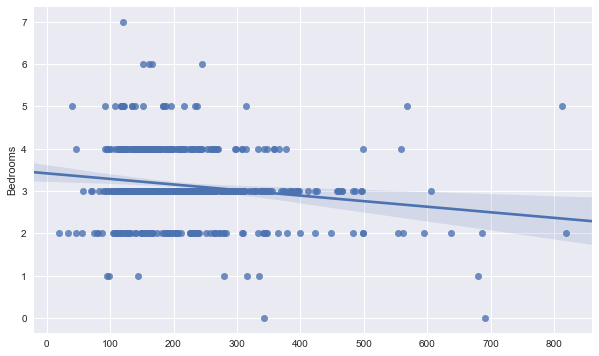

In [8]:
X=train[['Price_Per_Sqft']]
y=train['Bedrooms']
sns.regplot(X,y,data=train)

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

model = sm.OLS(y, X)
results = model.fit()

# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Bathrooms   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     1782.
Date:                Tue, 14 Nov 2017   Prob (F-statistic):          8.71e-185
Time:                        16:51:46   Log-Likelihood:                -1025.9
No. Observations:                 623   AIC:                             2054.
Df Residuals:                     622   BIC:                             2058.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Price_Per_Sqft     0.0090      0.000     42.220      0.000       0.009       0.009
==============================================================================
Omnibus:                      131.697   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              497.105
Skew:                          -0.936   Prob(JB):                    1.14e-108
Kurtosis:                       6.956   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

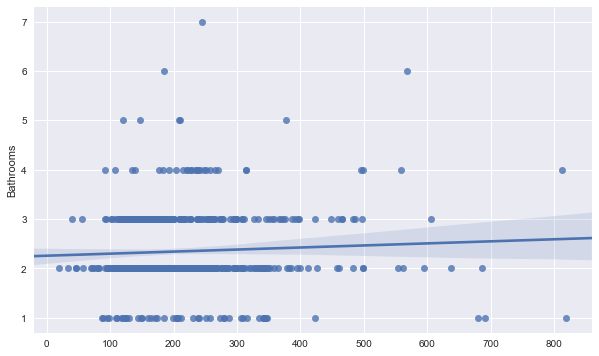

In [9]:
X=train[['Price_Per_Sqft']]
y=train['Bathrooms']
sns.regplot(X,y,data=train)


# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

model = sm.OLS(y, X)
results = model.fit()

# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Size   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     1381.
Date:                Tue, 14 Nov 2017   Prob (F-statistic):          4.59e-160
Time:                        16:51:47   Log-Likelihood:                -5230.4
No. Observations:                 623   AIC:                         1.046e+04
Df Residuals:                     622   BIC:                         1.047e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Price_Per_Sqft     6.7397      0.181     37.156      0.000       6.383       7.096
==============================================================================
Omnibus:                       76.269   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              647.633
Skew:                          -0.038   Prob(JB):                    2.33e-141
Kurtosis:                       7.994   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

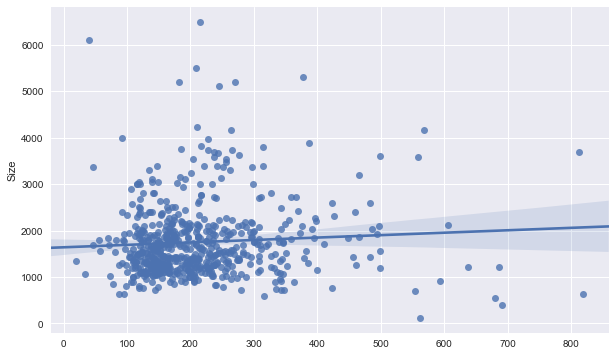

In [10]:
X=train[['Price_Per_Sqft']]
y=train['Size']
sns.regplot(X,y,data=train)


# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

model = sm.OLS(y, X)
results = model.fit()

# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Bedrooms   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     7937.
Date:                Tue, 14 Nov 2017   Prob (F-statistic):               0.00
Time:                        16:51:47   Log-Likelihood:                -799.63
No. Observations:                 623   AIC:                             1601.
Df Residuals:                     622   BIC:                             1606.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bathrooms      1.2636      0.014     89.092      0.000       1.236       1.291
==============================================================================
Omnibus:                       18.780   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.126
Skew:                          -0.390   Prob(JB):                     4.26e-05
Kurtosis:                       3.409   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

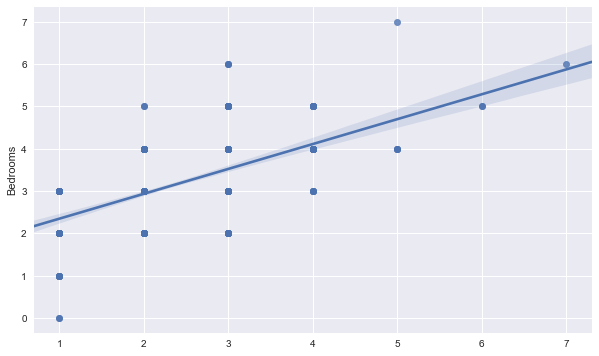

In [11]:
X=train[['Bathrooms']]
y=train['Bedrooms']
sns.regplot(X,y,data=train)


# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

model = sm.OLS(y, X)
results = model.fit()

# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Bedrooms   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     5146.
Date:                Tue, 14 Nov 2017   Prob (F-statistic):          5.16e-303
Time:                        16:51:48   Log-Likelihood:                -922.56
No. Observations:                 623   AIC:                             1847.
Df Residuals:                     622   BIC:                             1852.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Size           0.0016   2.22e-05     71.738      0.000       0.002       0.002
==============================================================================
Omnibus:                      262.889   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1474.579
Skew:                          -1.808   Prob(JB):                         0.00
Kurtosis:                       9.613   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

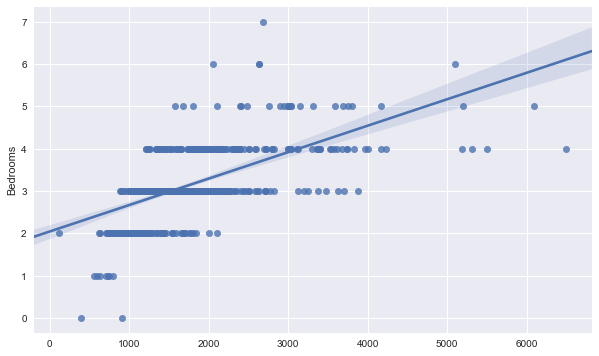

In [12]:
X=train[['Size']]
y=train['Bedrooms']
sns.regplot(X,y,data=train)

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

model = sm.OLS(y, X)
results = model.fit()

# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Size   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     7686.
Date:                Tue, 14 Nov 2017   Prob (F-statistic):               0.00
Time:                        16:51:48   Log-Likelihood:                -4787.2
No. Observations:                 623   AIC:                             9576.
Df Residuals:                     622   BIC:                             9581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bathrooms    748.8170      8.542     87.668      0.000     732.043     765.591
==============================================================================
Omnibus:                      337.570   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4264.394
Skew:                           2.118   Prob(JB):                         0.00
Kurtosis:                      15.097   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

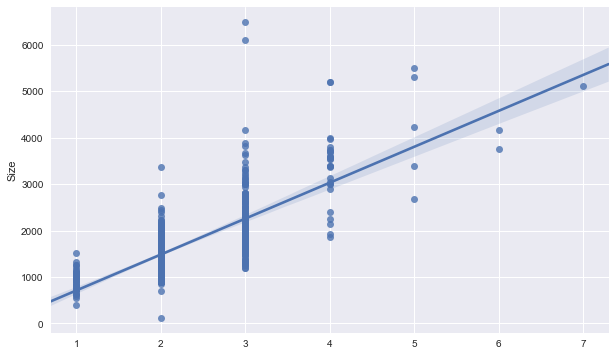

In [13]:
X=train[['Bathrooms']]
y=train['Size']
sns.regplot(X,y,data=train)


# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

model = sm.OLS(y, X)
results = model.fit()

# Statsmodels gives R-like statistical output
results.summary()

## Checking most Dependent among Predictors and target Variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1193.
Date:                Tue, 14 Nov 2017   Prob (F-statistic):          9.54e-147
Time:                        16:51:48   Log-Likelihood:                -8696.9
No. Observations:                 623   AIC:                         1.740e+04
Df Residuals:                     622   BIC:                         1.740e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bedrooms    1.195e+05   3459.300     34.535      0.000    1.13e+05    1.26e+05
==============================================================================
Omnibus:                      433.569   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6481.519
Skew:                           2.933   Prob(JB):                         0.00
Kurtosis:                      17.672   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

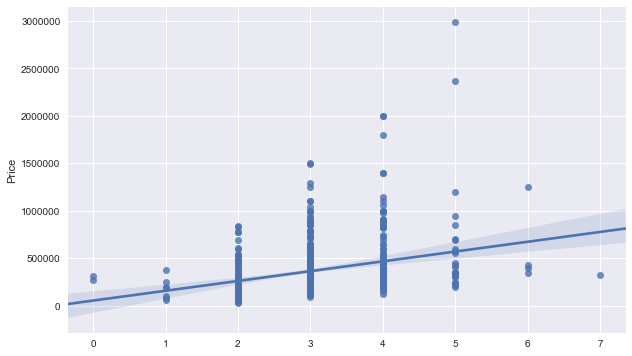

In [14]:
X=train[['Bedrooms']]
y=train['Price']
sns.regplot(X,y,data=train)


# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

model = sm.OLS(y, X)
results = model.fit()

# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     1723.
Date:                Tue, 14 Nov 2017   Prob (F-statistic):          2.23e-181
Time:                        16:51:49   Log-Likelihood:                -8617.1
No. Observations:                 623   AIC:                         1.724e+04
Df Residuals:                     622   BIC:                         1.724e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bathrooms   1.657e+05   3993.263     41.504      0.000    1.58e+05    1.74e+05
==============================================================================
Omnibus:                      456.298   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9189.886
Skew:                           3.029   Prob(JB):                         0.00
Kurtosis:                      20.814   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

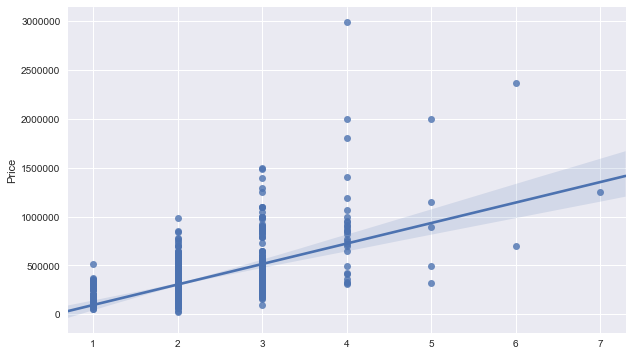

In [15]:
X=train[['Bathrooms']]
y=train['Price']
sns.regplot(X,y,data=train)


# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

model = sm.OLS(y, X)
results = model.fit()

# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     2529.
Date:                Tue, 14 Nov 2017   Prob (F-statistic):          2.59e-221
Time:                        16:51:49   Log-Likelihood:                -8525.0
No. Observations:                 623   AIC:                         1.705e+04
Df Residuals:                     622   BIC:                         1.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Size         222.5029      4.425     50.287      0.000     213.814     231.192
==============================================================================
Omnibus:                      495.114   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17601.659
Skew:                           3.185   Prob(JB):                         0.00
Kurtosis:                      28.249   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

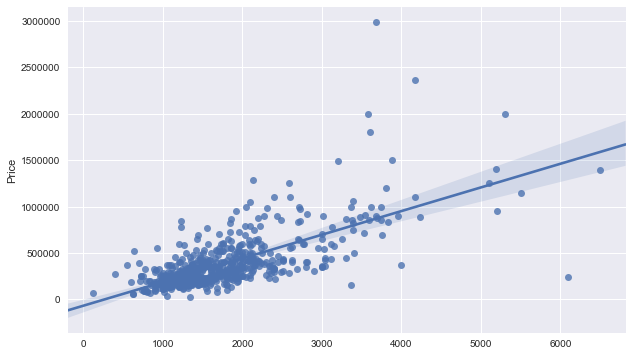

In [16]:
X=train[['Size']]
y=train['Price']
sns.regplot(X,y,data=train)


# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

model = sm.OLS(y, X)
results = model.fit()

# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     2377.
Date:                Tue, 14 Nov 2017   Prob (F-statistic):          1.26e-214
Time:                        16:51:50   Log-Likelihood:                -8540.5
No. Observations:                 623   AIC:                         1.708e+04
Df Residuals:                     622   BIC:                         1.709e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Price_Per_Sqft  1794.7891     36.815     48.751      0.000    1722.492    1867.087
==============================================================================
Omnibus:                      322.792   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4578.103
Skew:                           1.951   Prob(JB):                         0.00
Kurtosis:                      15.694   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

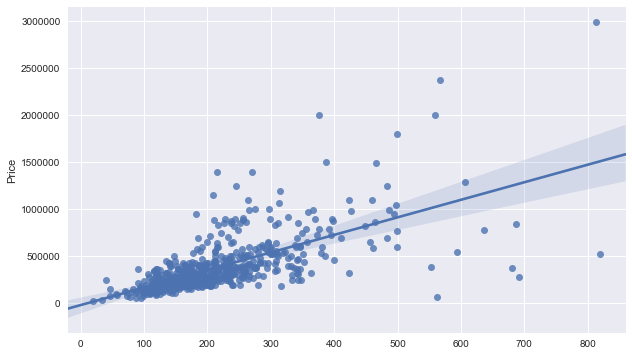

In [17]:
X=train[['Price_Per_Sqft']]
y=train['Price']
sns.regplot(X,y,data=train)


# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

model = sm.OLS(y, X)
results = model.fit()

# Statsmodels gives R-like statistical output
results.summary()

# Finding for best Model for making Prediction

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1457.
Date:                Tue, 14 Nov 2017   Prob (F-statistic):          3.01e-235
Time:                        16:51:50   Log-Likelihood:                -8488.7
No. Observations:                 623   AIC:                         1.698e+04
Df Residuals:                     621   BIC:                         1.699e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Price_Per_Sqft  1186.6195     66.667     17.799      0.000    1055.699    1317.540
Bathrooms       6.775e+04   6394.140     10.595      0.000    5.52e+04    8.03e+04
==============================================================================
Omnibus:                      506.871   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12274.854
Skew:                           3.474   Prob(JB):                         0.00
Kurtosis:                      23.606   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

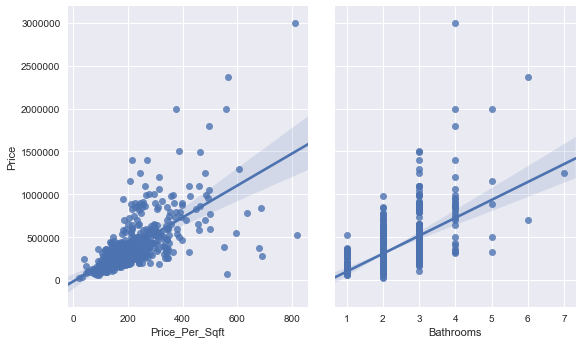

In [18]:
X = train[['Price_Per_Sqft','Bathrooms']]
y = train[['Price']]
sns.pairplot(train, x_vars=['Price_Per_Sqft','Bathrooms'], y_vars=['Price'], size=5, aspect=.8, kind="reg");

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

model = sm.OLS(y, X)
results = model.fit()

# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     2108.
Date:                Tue, 14 Nov 2017   Prob (F-statistic):          1.56e-277
Time:                        16:51:51   Log-Likelihood:                -8391.0
No. Observations:                 623   AIC:                         1.679e+04
Df Residuals:                     621   BIC:                         1.679e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Price_Per_Sqft   950.3855     52.011     18.273      0.000     848.246    1052.525
Size             125.2887      6.408     19.553      0.000     112.706     137.872
==============================================================================
Omnibus:                      643.682   Durbin-Watson:                   1.607
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36066.141
Skew:                           4.687   Prob(JB):                         0.00
Kurtosis:                      39.076   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

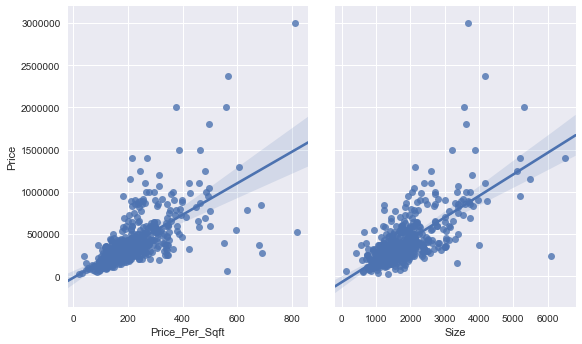

In [19]:
X = train[['Price_Per_Sqft','Size']]
y = train[['Price']]
sns.pairplot(train, x_vars=['Price_Per_Sqft','Size'], y_vars=['Price'], size=5, aspect=.8, kind="reg");

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

model = sm.OLS(y, X)
results = model.fit()

# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2336.
Date:                Tue, 14 Nov 2017   Prob (F-statistic):               0.00
Time:                        16:51:52   Log-Likelihood:                -8248.6
No. Observations:                 623   AIC:                         1.650e+04
Df Residuals:                     620   BIC:                         1.652e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Price_Per_Sqft  1252.7276     44.385     28.224      0.000    1165.564    1339.891
Size             260.4999      8.771     29.700      0.000     243.275     277.725
Bedrooms       -1.044e+05   5506.362    -18.953      0.000   -1.15e+05   -9.35e+04
==============================================================================
Omnibus:                      537.651   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45636.284
Skew:                           3.286   Prob(JB):                         0.00
Kurtosis:                      44.411   Cond. No.                     1.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

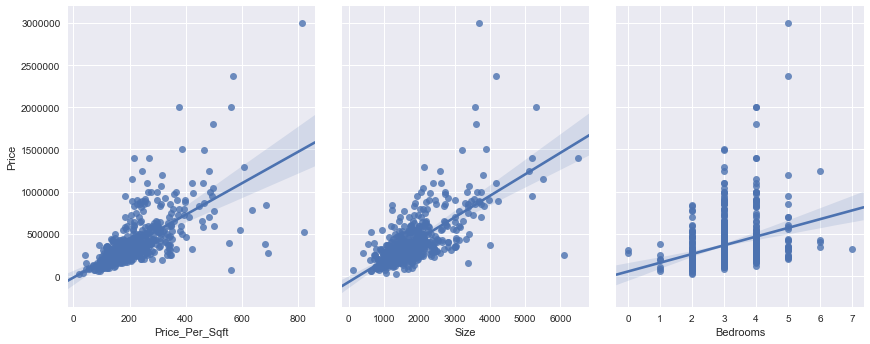

In [20]:
X = train[['Price_Per_Sqft','Size','Bedrooms']]
y = train[['Price']]
sns.pairplot(train, x_vars=['Price_Per_Sqft','Size','Bedrooms'], y_vars=['Price'], size=5, aspect=.8, kind="reg");

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

model = sm.OLS(y, X)
results = model.fit()

# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     718.7
Date:                Tue, 14 Nov 2017   Prob (F-statistic):           6.39e-90
Time:                        16:51:53   Log-Likelihood:                -2052.8
No. Observations:                 156   AIC:                             4112.
Df Residuals:                     153   BIC:                             4121.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Price_Per_Sqft  1124.0418     67.526     16.646      0.000     990.639    1257.445
Size             276.8316     14.324     19.327      0.000     248.534     305.129
Bedrooms       -1.051e+05   8863.325    -11.860      0.000   -1.23e+05   -8.76e+04
==============================================================================
Omnibus:                       67.037   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.054
Skew:                           1.647   Prob(JB):                     3.35e-52
Kurtosis:                       8.061   Cond. No.                     1.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

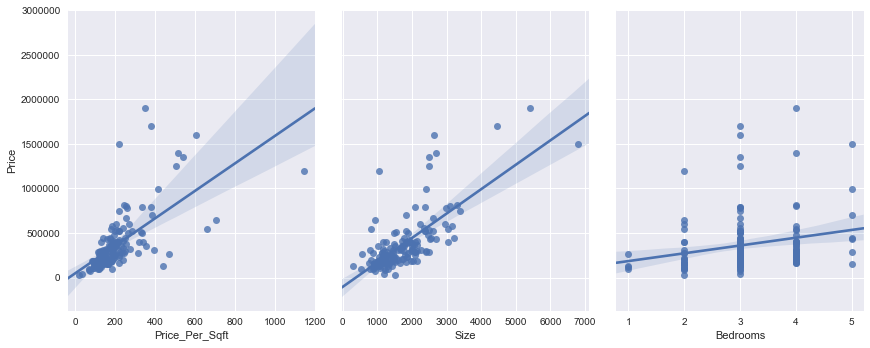

In [21]:
X1 = test[['Price_Per_Sqft','Size','Bedrooms']]
y1 = test[['Price']]
sns.pairplot(test, x_vars=['Price_Per_Sqft','Size','Bedrooms'], y_vars=['Price'], size=5, aspect=.8, kind="reg");

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X1, y1)

model = sm.OLS(y1, X1)
results = model.fit()

# Statsmodels gives R-like statistical output
results.summary()

## Checking Correlation by function and Heat Map

In [22]:
train.corr()

,MLS,Price,Bedrooms,Bathrooms,Size,Price_Per_Sqft
MLS,1.000000,-0.053906,-0.004581,-0.041064,-0.078559,-0.039421
Price,-0.053906,1.000000,0.289592,0.551267,0.693158,0.667124
Bedrooms,-0.004581,0.289592,1.000000,0.551961,0.606051,-0.167656
Bathrooms,-0.041064,0.551267,0.551961,1.000000,0.748829,0.056521
Size,-0.078559,0.693158,0.606051,0.748829,1.000000,0.068841
Price_Per_Sqft,-0.039421,0.667124,-0.167656,0.056521,0.068841,1.000000


                Bedrooms  Bathrooms      Size  Price_Per_Sqft
Bedrooms        1.000000   0.551961  0.606051       -0.167656
Bathrooms       0.551961   1.000000  0.748829        0.056521
Size            0.606051   0.748829  1.000000        0.068841
Price_Per_Sqft -0.167656   0.056521  0.068841        1.000000


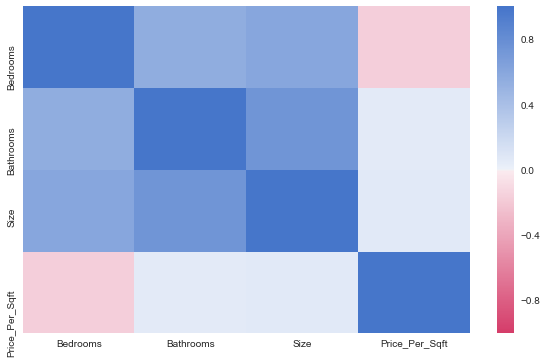

In [23]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = train[['Bedrooms','Bathrooms','Size','Price_Per_Sqft']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

                Bedrooms  Bathrooms      Size  Price_Per_Sqft     Price
Bedrooms        1.000000   0.551961  0.606051       -0.167656  0.289592
Bathrooms       0.551961   1.000000  0.748829        0.056521  0.551267
Size            0.606051   0.748829  1.000000        0.068841  0.693158
Price_Per_Sqft -0.167656   0.056521  0.068841        1.000000  0.667124
Price           0.289592   0.551267  0.693158        0.667124  1.000000


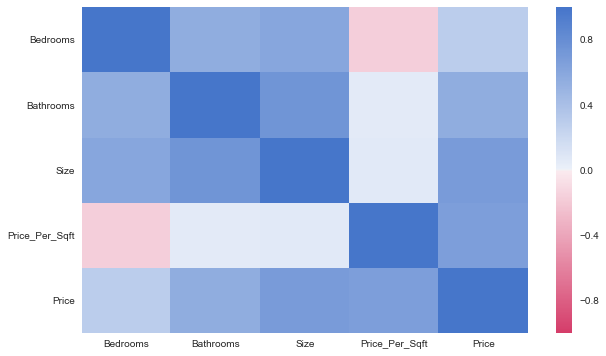

In [24]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = train[['Bedrooms','Bathrooms','Size','Price_Per_Sqft','Price']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

## Creating Model and comparing all X values with Y Value by plotting Regression

In [25]:
housing_model = ols("Price ~ Size + Price_Per_Sqft + Bedrooms", data=house).fit()
housing_model_summary = housing_model.summary()

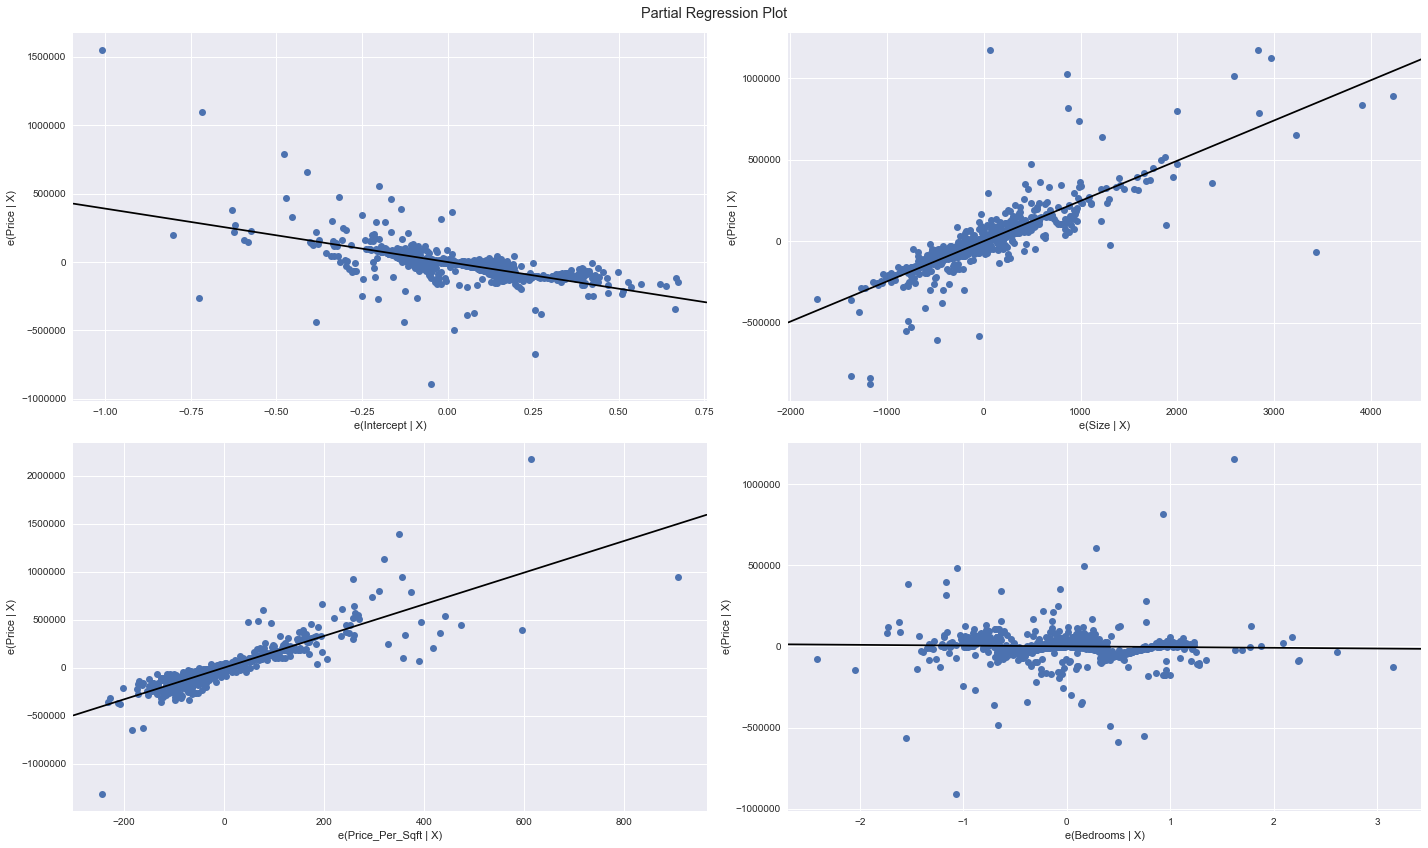

In [26]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(housing_model, fig=fig)

## Alloting Test and Train Sets, Showing the results in 3D Plot

In [60]:
Validate = train==False
x_train = train[['Price_Per_Sqft','Size','Bedrooms']]
y_train = train[['Price']]
x_validate = Validate[['Price_Per_Sqft','Size','Bedrooms']]
y_validate = Validate["Price"]
x_test=test[['Price_Per_Sqft','Size','Bedrooms']]
y_test=test[['Price']]

In [62]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns

In [29]:
# random.seed(100)
# rf = RandomForestClassifier(n_estimators=1000)
# rf.fit(x_train, y_train)

In [30]:
# status = rf.predict_proba(x_validate)
# fpr, tpr, _ = metrics.roc_curve(y_validate, status[:,1], pos_label=1)
# roc_auc = metrics.auc(fpr, tpr)
# print (roc_auc)

# final_status = rf.predict_proba(x_test)
# test["Price"]=final_status[:,1]
# test.to_csv('../Assignment2/model_output.csv',columns=['Price_Per_Sqft','Size','Bedrooms','Price'])

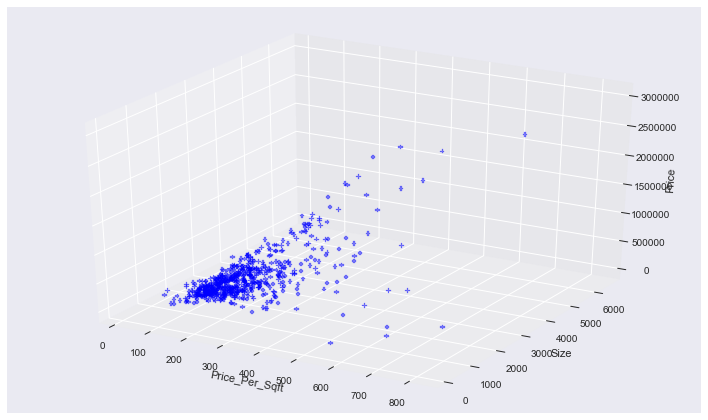

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train['Price_Per_Sqft'],train['Size'],train['Price'],c='blue', marker='P', alpha=0.5)
#ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='None', alpha=0.01)
ax.set_xlabel('Price_Per_Sqft')
ax.set_ylabel('Size')
ax.set_zlabel('Price')
fig.tight_layout()
plt.show()

## Predicting the Price of House and Finding RMSE & Mean

In [32]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

predictions = lm.predict(X)
print(predictions)

[[  153324.70971638]
 [  319917.90617486]
 [  410364.63602467]
 [  580553.36864557]
 [   79234.11683741]
 [  459805.25229169]
 [  172970.822138  ]
 [  405906.80579095]
 [   77909.56134887]
 [  160937.89700799]
 [  403839.94315038]
 [  427466.7227103 ]
 [  269617.81148784]
 [   38397.42634879]
 [  140062.56960928]
 [  444708.77114882]
 [  957379.26812071]
 [  250816.98145276]
 [  358131.14933927]
 [  162590.93925369]
 [   97133.16502111]
 [  628524.26030412]
 [  614241.4441879 ]
 [  935497.82206466]
 [  340447.82236889]
 [  586769.25616639]
 [  210099.5630454 ]
 [  397496.94537622]
 [  932183.4075772 ]
 [   73709.95942503]
 [  129969.65256101]
 [  718172.81462761]
 [  494364.19055833]
 [   19892.93911144]
 [  180920.64735382]
 [ 1045428.74293186]
 [  312121.20032448]
 [   65852.41374661]
 [  240545.8017523 ]
 [  253412.58997281]
 [  406086.3777691 ]
 [  375432.13083209]
 [  354643.50117001]
 [  767979.52371049]
 [  234013.54849296]
 [  299834.77597544]
 [  569953.39172046]
 [   96015.50

In [33]:
lreg = linear_model.LinearRegression()
model = lm.fit(X1,y1)

prediction_test = lm.predict(X1)
print(prediction_test)

[[  722728.9510907 ]
 [  663446.98570278]
 [  195009.99267208]
 [  208235.21314427]
 [  362675.02860614]
 [  689095.42170721]
 [  420992.23600814]
 [  559162.07848345]
 [  782002.55544661]
 [  192455.48930107]
 [  125713.34443222]
 [  162864.69013261]
 [  305952.6228556 ]
 [   66374.4427683 ]
 [  226826.45276606]
 [  482078.77722062]
 [  304404.99931177]
 [  218778.78551117]
 [  182816.85639313]
 [  793169.99278472]
 [   64973.88242912]
 [   64012.9592609 ]
 [  186596.61346555]
 [  122043.42735149]
 [  830093.51306759]
 [  419051.14054301]
 [   51695.95647702]
 [   43244.01537414]
 [  711769.09438116]
 [  137044.25409432]
 [    3967.43408782]
 [  343647.02338066]
 [  386722.75966072]
 [  235215.25052406]
 [  402950.77764827]
 [  817546.85118371]
 [  353312.53098991]
 [  239121.02056419]
 [  835739.02404913]
 [  146404.81367406]
 [   68621.74443843]
 [  415194.58484576]
 [  101246.06267005]
 [  101246.06267005]
 [  101246.06267005]
 [  101246.06267005]
 [  205104.80981486]
 [  175203.71

In [34]:
rmse = np.sqrt(metrics.mean_squared_error(y, predictions))
rmse

106785.84710803743

In [35]:
y_m=np.mean(y)
y_m

Price    377959.927769
dtype: float64

In [36]:
rmse/y_m

Price    0.282532
dtype: float64

## Plotting Actual Price and Predicted Price in Plot, Finding Score and Intercept

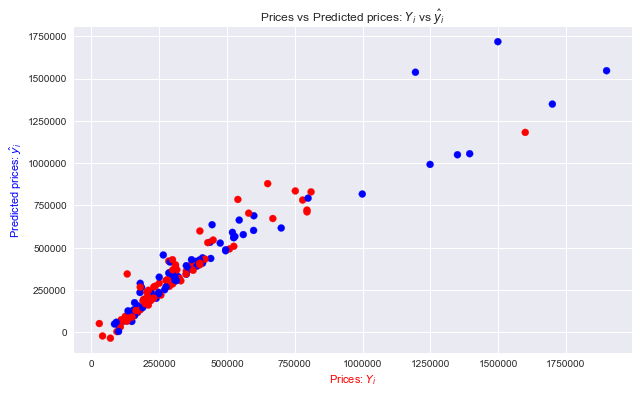

In [37]:
y_pred = lm.predict(x_test)

plt.scatter(y_test, y_pred, color=['red','blue'])
plt.xlabel("Prices: $Y_i$", color='red')
plt.ylabel("Predicted prices: $\hat{y}_i$", color='blue')
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{y}_i$")

In [38]:
lm.coef_ , lm.intercept_

(array([[  1429.32281188,    268.3841321 , -14352.71332005]]),
 array([-349803.62499263]))

In [39]:
lm.score(X,y)

0.85227072540850601

## Regularization

In [40]:
from pandas import Series, DataFrame
## Ridge Regression
from sklearn.linear_model import Ridge

In [41]:

ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)
mse = np.mean((prediction_test - y_test)**2)

In [42]:
mse

Price    9.822638e+09
dtype: float64

In [43]:
ridgeReg.score(x_test,y_test)

0.88535981608205017

In [44]:
## Lasso Regression
from sklearn.linear_model import Lasso

In [45]:
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_test)
mse = np.mean((prediction_test - y_test)**2)

In [46]:
mse

Price    9.822638e+09
dtype: float64

In [47]:
lassoReg.score(x_test,y_test)

0.88394857842168206

In [48]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet
ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(x_train,y_train)
pred_cv = ENreg.predict(x_test)
mse = np.mean((prediction_test - y_test)**2)

In [49]:
mse

Price    9.822638e+09
dtype: float64

In [50]:
ENreg.score(x_test,y_test)

0.88394451634641935

### Is the relationship significant?
    > Yes, the relationship seems significant based on the calculation and Plotting that I did to get the best possible predictors and target variables. I compared all of that with all possible permutations and combinations and finally got the best fit as my final predicting model of actual House Price.
    > Most Significant Relationships is found were - Price_Per_Sqft(X1) and Price(Y)
                                                   - Size(X2) and Price(Y)
                                                   - Bedrooms(X3) and Price(Y)
    > Others were slighlty related and may effect by overfitting data so I kept these 3 as my best fit model.
    

### Are any Model Assumptions Violated?
    > Previously it was violating due to the adding more predictors or removing predictors from the current model. But after all trial and error Model Fits perfect and giving more than 91% accuracy on predictions.
    
### In the multiple models are predictor variables independent of all the other predictor variables?
    > Yes, That is why I compares each and every X variable and checked for their Collinearity. Also found VIF to verify If the predictors are giving good results.
    
### In multiple models rank the most significant predictor variables and exclude insignificant ones from the model.
    > Rank1 - Price_Per_Sqft
    > Rank2 - Size
    > Rank3 - Bedrooms
    
    Excluding - Bathrooms, Location, MLS and Status
    
### Does the model make sense?
    > Yes but not absolutely, If time is not a concern we can use more algorithms and techniques to get nearest possible prediction. Also using categorical as well as non categorial values and predicting on that basis may improve the predictions by 5-6% atleast.
    
### Does regularization help?    
    > Offcourse, all the time. Regularisation help us to understand and remove the errors in our data and lead us to achieve best possible predictions.It helps in making perfect fit model.